In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import expand, I, im, symbols, re

import correlator as corr

In [2]:
eps = symbols('eps')

In [3]:
mass_1, mass_2, mass_3 = 1, 2, 3

In [4]:
beta = 10

In [5]:
p1 = [0, 0, 0, 0]
p2 = [0, 0, 0, 0]

In [11]:
n_range = np.array([n for n in range(-20, 21)])

In [12]:
corr_finite_temp_data = np.array([corr.finite_temp_term(p1, p2, mass_1, mass_2, mass_3, beta, n) for n in n_range])

In [13]:
Gamma_finite_temp_data = np.array([expand(I*ftd).subs('eps', 0) for ftd in corr_finite_temp_data])
Gamma_finite_temp_data_re = np.array([re(x) for x in Gamma_finite_temp_data])
Gamma_finite_temp_data_im = np.array([im(x) for x in Gamma_finite_temp_data])

In [46]:
Gamma_finite_temp_data_re

array([4.79936837480091370e-7, 5.57204610271554455e-7,
       6.51819281638939449e-7, 7.68878493922146150e-7,
       9.15364233368544791e-7, 1.10099569100619048e-6,
       1.33954438511028811e-6, 1.65090856989756401e-6,
       2.06446287641101721e-6, 2.62460936394897024e-6,
       3.40022889064285291e-6, 4.50124290152753605e-6,
       6.10847742953759171e-6, 8.52895315290015340e-6,
       0.0000123001117052274635, 0.0000183854846229225858,
       0.0000285179872103672903, 0.0000456395498767070027,
       0.0000735189500504309030, 0.000110789947420074451,
       0.000132629300321475581, 0.000110789947420074451,
       0.0000735189500504309030, 0.0000456395498767070027,
       0.0000285179872103672903, 0.0000183854846229225858,
       0.0000123001117052274635, 8.52895315290015340e-6,
       6.10847742953759171e-6, 4.50124290152753605e-6,
       3.40022889064285291e-6, 2.62460936394897024e-6,
       2.06446287641101721e-6, 1.65090856989756401e-6,
       1.33954438511028811e-6, 1.100995691

Text(0, 0.5, '$\\mathrm{Re}\\Gamma\\times 10^5$')

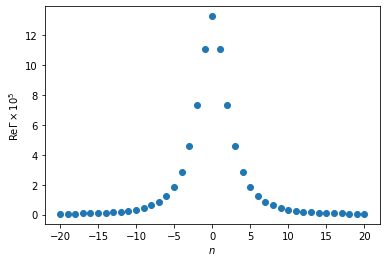

In [15]:
fig, ax = plt.subplots()
ax.scatter(n_range, 1e5*Gamma_finite_temp_data_re)
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$\mathrm{Re}\Gamma\times 10^5$')

In [146]:
qq_grid = np.linspace(0, 5, 11)
p1_p2_grid = [corr.p1_p2(qq) for qq in qq_grid]
n_grid = np.arange(-5, 6)
corr_seq = np.array([[corr.finite_temp_term(*momenta, mass_1, mass_2, mass_3, beta, n) for n in n_grid] for momenta in p1_p2_grid])

In [147]:
num_rows = corr_seq.shape[0]
num_cols = corr_seq.shape[1]
Gamma_seq = np.zeros(corr_seq.size, dtype='complex').reshape(corr_seq.shape)
for row in range(num_rows):
    for col in range(num_cols):
        Gamma_seq[row, col] = 1j * corr_seq[row, col].subs('eps', 0)

In [148]:
n_max = n_grid[-1]
Gamma_partial_sums = np.zeros(num_rows * (n_max + 1), dtype='complex').reshape(num_rows, n_max + 1)
Gamma_partial_sums[:, 0] = Gamma_seq[:, n_max]

for n in range(1, n_max + 1):
    Gamma_partial_sums[:, n] = Gamma_partial_sums[:, n - 1] + Gamma_seq[:, n_max + n] + Gamma_seq[:, n_max - n]


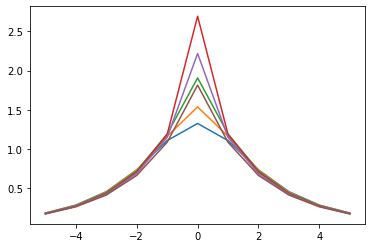

In [149]:
fig, ax = plt.subplots()
ax.plot(n_grid, 1e4 * np.array([re(x) for x in Gamma_seq[0]]))
ax.plot(n_grid, 1e4 * np.array([re(x) for x in Gamma_seq[1]]))
ax.plot(n_grid, 1e4 * np.array([re(x) for x in Gamma_seq[2]]))
ax.plot(n_grid, 1e4 * np.array([re(x) for x in Gamma_seq[3]]))
ax.plot(n_grid, 1e4 * np.array([re(x) for x in Gamma_seq[4]]))
ax.plot(n_grid, 1e4 * np.array([re(x) for x in Gamma_seq[5]]))

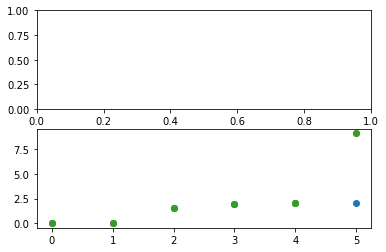

In [130]:
fig, ax = plt.subplots(2)
ax[1].scatter(qq_grid, 1e4 * np.array([re(s) for s in partial_sums[:, 0]]))
ax[1].scatter(qq_grid, 1e4 * np.array([re(s) for s in partial_sums[:, 1]]))
ax[1].scatter(qq_grid, 1e4 * np.array([re(s) for s in partial_sums[:, 2]]))